In [23]:
import skcriteria as skc  # we use skc as an abbreviation for scikit-criteria

In [24]:
# Let's say we have 2 decision makers,
# analyzing 3 conditions (age, bmi, skin thickness)

matrix = [
    [20, 20, 15],  # dm1
    [40, 25, 22],  # dm2
    
]
matrix

[[20, 20, 15], [40, 25, 22]]

In [25]:
# Let's say we want to rank on which patient is more vulnerable to diabetes
# We set age and bmi for maximization, and skin thickness for minimization. 
objectives = [max, max, min]
objectives

[<function max>, <function max>, <function min>]

In [30]:
# Assign weights to the conditions ( add up to 1 )
weights=[0.5, 0.05, 0.45]

In [31]:
dm = skc.mkdm(
    matrix,
    objectives,
    weights,
    alternatives=["Patient 1", "Patient 2"],
    criteria=["Age", "BMI", "Skin Thickness"],
)
dm

,Age[▲ 0.50],BMI[▲ 0.05],Skin Thickness[▼ 0.45]
Patient 1,20,20,15
Patient 2,40,25,22


In [32]:
dm.matrix  # this data ignores the objectives and the weights

Criteria,Age,BMI,Skin Thickness
Alternatives,,,
Patient 1,20,20,15
Patient 2,40,25,22


<AxesSubplot:xlabel='Criteria', ylabel='Alternatives'>

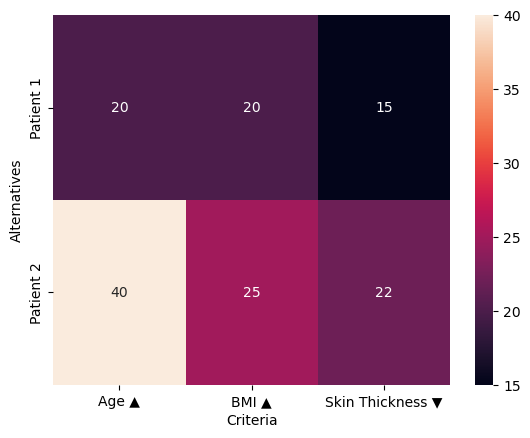

In [33]:
dm.plot()

<AxesSubplot:xlabel='Criteria'>

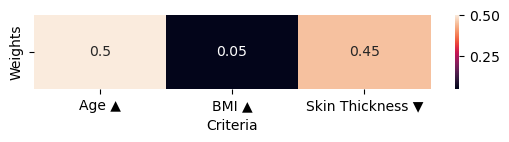

In [34]:
dm.plot.wheatmap()

<AxesSubplot:ylabel='Density'>

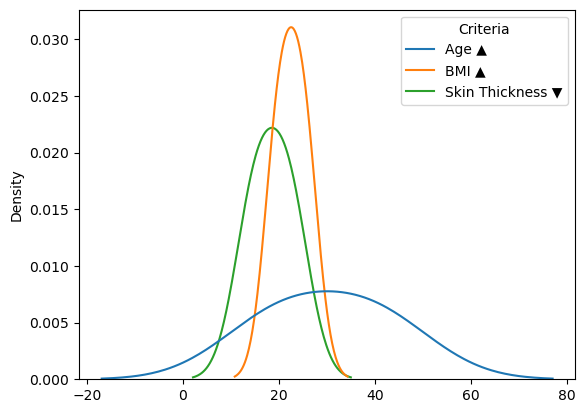

In [35]:
dm.plot("kde")

<AxesSubplot:>

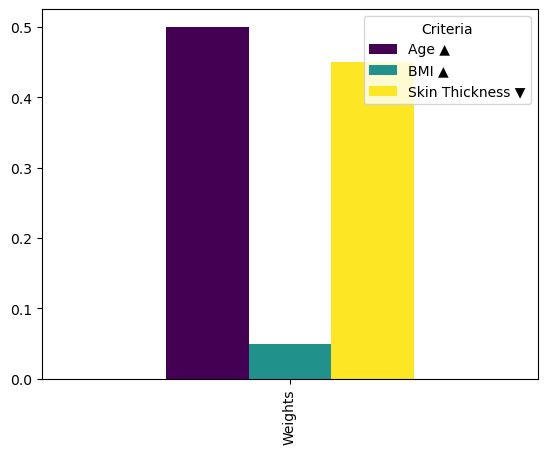

In [36]:
dm.plot.wbar(cmap="viridis")

In [47]:
from skcriteria.preprocessing import invert_objectives, scalers

# Invert minimize - 1/ criterion

inverter = invert_objectives.InvertMinimize()
dmt = inverter.transform(dm)
dmt

,Age[▲ 0.50],BMI[▲ 0.05],Skin Thickness[▲ 0.45]
Patient 1,20,20,0.066667
Patient 2,40,25,0.045455


In [48]:
# Sum Scaler - Normalize scale (0-1)

scaler = scalers.SumScaler(target="both")
dmt = scaler.transform(dmt)
dmt

,Age[▲ 0.50],BMI[▲ 0.05],Skin Thickness[▲ 0.45]
Patient 1,0.333333,0.444444,0.594595
Patient 2,0.666667,0.555556,0.405405


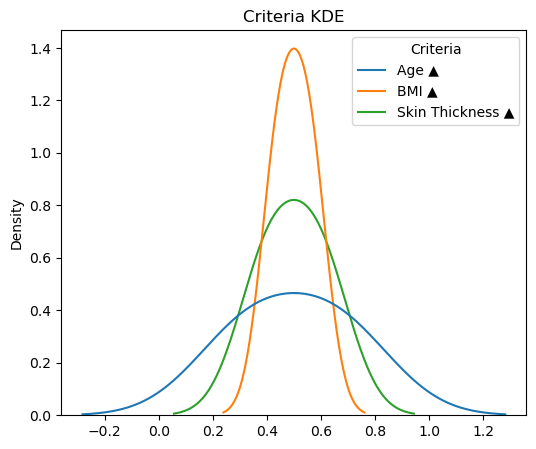

In [50]:
import matplotlib.pyplot as plt

# Create a figure for the criteria KDE plot
fig1, axs1 = plt.subplots(figsize=(6, 5))

# Plot the criteria KDE
dmt.plot.kde(ax=axs1)
axs1.set_title("Criteria KDE")

# Show the figure
plt.show()


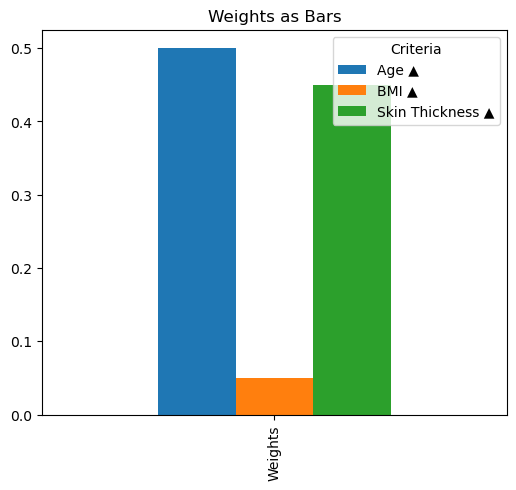

In [51]:
import matplotlib.pyplot as plt

# Create a figure for the weights as bars plot
fig2, axs2 = plt.subplots(figsize=(6, 5))

# Plot the weights as bars
dmt.plot.wbar(ax=axs2)
axs2.set_title("Weights as Bars")

# Show the figure
plt.show()


In [52]:
# Weighted Sum Model

from skcriteria.madm import simple

In [57]:
dec = simple.WeightedSumModel()
rankWS = dec.evaluate(dmt)  # we use the tansformed version of the data
rankWS

Alternatives,Patient 1,Patient 2
Rank,2,1


In [54]:
# TOPSIS

from skcriteria.madm import similarity  # here lives TOPSIS
from skcriteria.pipeline import mkpipe  # this function is for create pipelines


In [55]:
pipe = mkpipe(
    invert_objectives.NegateMinimize(),
    scalers.VectorScaler(target="matrix"),  # this scaler transform the matrix
    scalers.SumScaler(target="weights"),  # and this transform the weights
    similarity.TOPSIS(),
)

pipe

<SKCPipeline [steps=[('negateminimize', <NegateMinimize []>), ('vectorscaler', <VectorScaler [target='matrix']>), ('sumscaler', <SumScaler [target='weights']>), ('topsis', <TOPSIS [metric='euclidean']>)]]>

In [58]:
rankTOPSIS = pipe.evaluate(dm)
rankTOPSIS

Alternatives,Patient 1,Patient 2
Rank,2,1


In [61]:
#TOPSIS Metrics

print(rank.e_)
print("Ideal:", rank.e_.ideal)
print("Anti-Ideal:", rank.e_.anti_ideal)
print("Similarity index:", rank.e_.similarity)

<extra {'ideal', 'similarity', 'anti_ideal'}>
Ideal: [ 0.4472136   0.03904344 -0.25350157]
Anti-Ideal: [ 0.2236068   0.03123475 -0.3718023 ]
Similarity index: [0.34586425 0.65413575]
